In [13]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install pyodbc


Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
import pyodbc
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn import linear_model

from keras. layers import LSTM, Dense, Dropout
from keras. models import Sequential
from keras. layers import Dense
import keras. backend as K
from keras. callbacks import EarlyStopping
from keras. models import load_model
from keras. layers import LSTM
from keras. utils.vis_utils import plot_model
from keras.optimizers import Adam


In [19]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install Keras


Note: you may need to restart the kernel to use updated packages.


In [21]:
#get the view table from SQL
# Define the connection details
server = 'stocksserver.database.windows.net' 
database = 'stockdb' 
username = 'Evelyn'
password = 'Apple2327'

# Establish the connection
conn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
query_price = "SELECT * FROM Daily_Price;"
# Execute the query and create a DataFrame
clean_df = pd.read_sql(query_price, conn)

# Don't forget to close the connection when done
conn.close()






C:\Users\Evelyn\AppData\Local\Temp\ipykernel_31864\4071412966.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  clean_df = pd.read_sql(query_price, conn)


In [22]:
clean_df

,Ticker,Date,Open_Price,High_Price,Low_Price,Close_Price,Volume
0,AAL,2005-10-07,20.90,23.00,20.90,22.15,16350134
1,AAL,2005-10-14,22.28,22.40,21.40,22.27,9746113
2,AAL,2005-10-21,22.15,22.42,20.85,21.96,14218231
3,AAL,2005-10-28,22.01,23.90,21.70,23.90,9263807
4,AAL,2005-11-04,24.00,29.00,24.00,28.80,16788473
...,...,...,...,...,...,...,...
45681,XOM,2024-01-12,100.73,101.29,98.16,99.95,94947905
45682,XOM,2024-01-19,99.82,100.01,95.82,96.95,79648421
45683,XOM,2024-01-26,96.70,103.08,95.77,103.00,95840552
45684,XOM,2024-02-02,102.98,104.88,101.61,101.97,101557866


In [23]:
#check null values
print('Dataframe Shape: ', clean_df. shape)

missing_values = clean_df.isna().any().any()
missing_values 

Dataframe Shape:  (45686, 7)


False

In [24]:
#adjust datetime

import datetime

def str_to_datetime(s):
    split =s.split('-')
    year,month,day=int(split[0]),int(split[1]),int(split[2])

    return datetime.datetime(year=year,month=month,day=day)




In [25]:
# Filter DataFrame for the desired symbol
AAPL_df = clean_df[clean_df['Ticker'] == 'AAPL']
AAPL_df

,Ticker,Date,Open_Price,High_Price,Low_Price,Close_Price,Volume
957,AAPL,1999-11-12,87.75,97.73,86.75,90.62,25776200
958,AAPL,1999-11-19,89.62,94.75,88.06,92.44,13711000
959,AAPL,1999-11-26,91.75,95.50,88.50,95.06,9757600
960,AAPL,1999-12-03,94.25,115.56,93.25,115.00,28046300
961,AAPL,1999-12-10,114.56,118.00,99.00,103.00,25152800
...,...,...,...,...,...,...,...
2217,AAPL,2024-01-05,187.15,188.44,180.17,181.18,275083628
2218,AAPL,2024-01-12,182.09,187.05,181.50,185.92,238385377
2219,AAPL,2024-01-19,182.16,191.95,180.30,191.56,259829213
2220,AAPL,2024-01-26,192.30,196.38,191.94,192.42,255368848


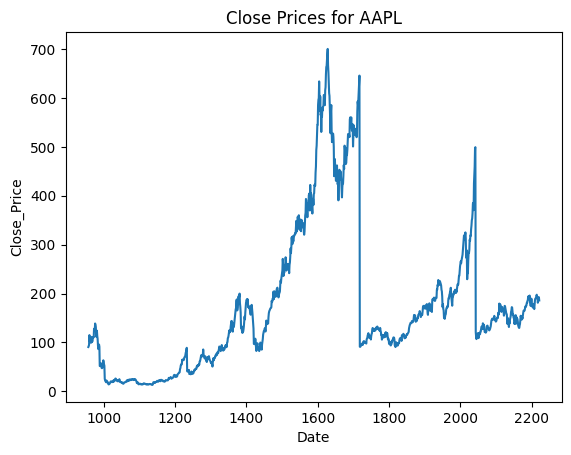

In [26]:

# Plot closing prices
AAPL_df['Close_Price'].plot()
# # Add labels and title
plt.xlabel('Date')
plt.ylabel('Close_Price')
plt.title('Close Prices for AAPL')
# Show plot
plt.show()

In [27]:
#Set Target Variable
AAPL_output = AAPL_df['Close_Price']
#Selecting the Features 
features = ['Open_Price','High_Price','Low_Price','Volume']

#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(AAPL_df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=AAPL_df.index)
feature_transform.head()

,Open_Price,High_Price,Low_Price,Volume
957,0.108741,0.121630,0.108724,0.017455
958,0.111466,0.117320,0.110648,0.007061
959,0.114570,0.118405,0.111294,0.003655
960,0.118213,0.147417,0.118270,0.019410
961,0.147810,0.150946,0.126715,0.016918


In [28]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install graphviz 

In [30]:
pip install pydot-ng

Note: you may need to restart the kernel to use updated packages.
